# $t\bar{t}$ contam: shifted regions

**Motivation:** Shota + Liaoshan did some trainings w/ the reweighting, and they found some poorer performance for the low $m_{h1}, m_{h2}$ regions.

I think it is an open question if this is just b/c of the trigger contamination, or b/c of the evolution of the $t\bar{t}$ dependence that we come across when we are in the region of the $X_{Wt}$ induced stripes in the massplane.


In [15]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt

import os

os.sys.path.append('../gp-for-flows/')
from flows import data, yr_to_mc

os.sys.path.append('../../hh4b/hh4b-plots/')
from hh4b_plots.hh4b_plots import draw_contours, get_region_set
from hh4b_plots.colors import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
yr = 16

In [3]:
# plt.imshow(h_qcd[::-1])

**Step 1:** Visualize the shifted regions

In [4]:
# Load in the data

fname  = f'../data/RR/cryptotuples/data{yr}.root' 
ahname = f'../data/RR/cryptotuples/ttbar/quads/MC/410471_mc16{yr_to_mc[yr]}/NanoNTuple.root' 
slname = f'../data/RR/cryptotuples/ttbar/quads/MC/410470_mc16{yr_to_mc[yr]}/NanoNTuple.root'

x=124
y=117
eps=0.05
r_CR=45

nSplits=-1
replica=0

# 4b
ntag=4
minQ=0

# 3b1l
# ntag=3
# minQ=2

# 3b1f
# ntag=3
# minQ=1

# 2b
# ntag=2
# minQ=0


In [5]:
pargs = (x, y, eps, 200, # r_CR 
         ntag, minQ, nSplits, replica, 0, 0)
d = data( [fname], *pargs, is_mc=False)

ah = data([ahname], *pargs, is_mc=True)
sl = data([slname], *pargs, is_mc=True)

../data/RR/cryptotuples/data16.root
len(df) 192599
../data/RR/cryptotuples/ttbar/quads/MC/410471_mc16a/NanoNTuple.root
len(df) 33362
Scaling the lumi in ../data/RR/cryptotuples/ttbar/quads/MC/410471_mc16a/NanoNTuple.root by 24.6 ifb.
../data/RR/cryptotuples/ttbar/quads/MC/410470_mc16a/NanoNTuple.root
len(df) 36553
Scaling the lumi in ../data/RR/cryptotuples/ttbar/quads/MC/410470_mc16a/NanoNTuple.root by 24.6 ifb.


In [76]:
os.sys.path.append('../PAG-opt/')
from plots import draw_SR, draw_VR, draw_CR

**Step 2:** Calculate the $t\bar{t}$ / dat percentage.

In [102]:
x,y = 124,117

/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/Shape-Syst/../PAG-opt/plots.py:17: RuntimeWarning: invalid value encountered in sqrt
  SR_y1 = y / (1 + res_y * np.sqrt(np.power(Xhh, 2) - alpha))
/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/Shape-Syst/../PAG-opt/plots.py:18: RuntimeWarning: invalid value encountered in sqrt
  SR_y2 = y / (1 - res_y * np.sqrt(np.power(Xhh, 2) - alpha))
/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/Shape-Syst/../PAG-opt/plots.py:17: RuntimeWarning: invalid value encountered in sqrt
  SR_y1 = y / (1 + res_y * np.sqrt(np.power(Xhh, 2) - alpha))
/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/Shape-Syst/../PAG-opt/plots.py:18: RuntimeWarning: invalid value encountered in sqrt
  SR_y2 = y / (1 - res_y * np.sqrt(np.power(Xhh, 2) - alpha))
/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/Shape-Syst/../PAG-opt/plots.py:17: RuntimeWarning: invalid value encountered in sqrt
  SR_y1 = y / (1 + res_y * np.sqrt(np.power(Xhh, 2) - alpha))
/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/Shape-Syst/..

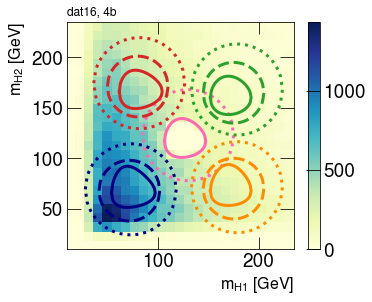

In [112]:
plt.figure(figsize=(5,4))
h_dat,ex,ey,_ = plt.hist2d(*d.df[['m_h1','m_h2']].values.T,
                           [25,25],[[10,235],[10,235]], 
                           cmap="YlGnBu")
plt.xlabel('$m_{H1}$ [GeV]',fontsize=16,loc='right')
plt.ylabel('$m_{H2}$ [GeV]',fontsize=16,loc='top')

plt.title(f'dat{yr}, {ntag}b',loc='left')

plt.colorbar()
    
# Draw our current SR
xx,yy = draw_SR(x,y)
plt.plot(xx,yy,'hotpink',label=f'SR: ({x:.0f},{y:.0f})',lw=3)

xx,yy = draw_CR(x,y)
plt.plot(xx,yy,'hotpink',ls='dotted',label=f'CR: ({x:.0f},{y:.0f})',lw=3)

for i, xi,yi, ci in zip(range(4),[70,170,170,78],
                          [66,68,160,166],
                          ['navy','darkorange','C2','C3']):
    
    res_xi = 0.1*x/xi
    res_yi = 0.1*y/yi
        
    for f, ls in zip([draw_SR,draw_VR,draw_CR],['-','--','dotted']):
        if ls == '-':
            args = (xi,yi,res_xi,res_yi)
        else:
            args = (xi,yi)
        xx,yy = f(*args)
        plt.plot(xx,yy,ci,ls=ls,lw=3)
    
plt.show()

In [113]:
mc = yr_to_mc[yr]

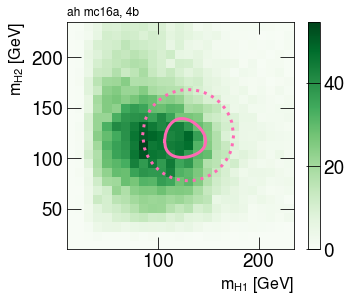

In [123]:
plt.figure(figsize=(5,4))
h_ah,ex,ey,_ = plt.hist2d(*ah.df[['m_h1','m_h2']].values.T,
                           [25,25],[[10,235],[10,235]], 
                           cmap="Greens",
                           weights=ah.df['mc_sf'].values)
plt.xlabel('$m_{H1}$ [GeV]',fontsize=16,loc='right')
plt.ylabel('$m_{H2}$ [GeV]',fontsize=16,loc='top')

plt.title(f'ah mc16{mc}, {ntag}b',loc='left')

plt.colorbar()


xx,yy = draw_SR(x,y)
plt.plot(xx,yy,'hotpink',label=f'SR: ({x:.0f},{y:.0f})',lw=3)

xx,yy = draw_CR(x,y)
plt.plot(xx,yy,'hotpink',ls='dotted',label=f'CR: ({x:.0f},{y:.0f})',lw=3)


plt.show()

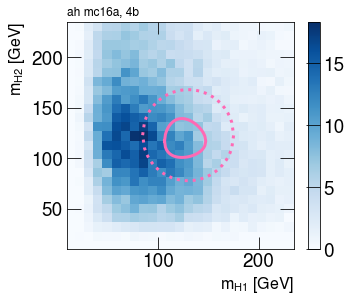

In [124]:
plt.figure(figsize=(5,4))
h_sl,ex,ey,_ = plt.hist2d(*sl.df[['m_h1','m_h2']].values.T,
                           [25,25],[[10,235],[10,235]], 
                           cmap="Blues",
                           weights=sl.df['mc_sf'].values)
plt.xlabel('$m_{H1}$ [GeV]',fontsize=16,loc='right')
plt.ylabel('$m_{H2}$ [GeV]',fontsize=16,loc='top')

plt.title(f'ah mc16{mc}, {ntag}b',loc='left')

plt.colorbar()

xx,yy = draw_SR(x,y)
plt.plot(xx,yy,'hotpink',label=f'SR: ({x:.0f},{y:.0f})',lw=3)

xx,yy = draw_CR(x,y)
plt.plot(xx,yy,'hotpink',ls='dotted',label=f'CR: ({x:.0f},{y:.0f})',lw=3)


plt.show()

In [116]:
h_qcd = h_dat - h_ah - h_sl

In [117]:
mids_x = 0.5 * (ex[1:] + ex[:-1])
mids_y = 0.5 * (ey[1:] + ey[:-1])

xx, yy = np.meshgrid(mids_x, mids_y)
m1m2 = np.vstack([xx.flatten(), yy.flatten()]).T

In [118]:
m1m2.shape

(625, 2)

/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/Shape-Syst/../PAG-opt/plots.py:17: RuntimeWarning: invalid value encountered in sqrt
  SR_y1 = y / (1 + res_y * np.sqrt(np.power(Xhh, 2) - alpha))
/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/Shape-Syst/../PAG-opt/plots.py:18: RuntimeWarning: invalid value encountered in sqrt
  SR_y2 = y / (1 - res_y * np.sqrt(np.power(Xhh, 2) - alpha))
/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/Shape-Syst/../PAG-opt/plots.py:17: RuntimeWarning: invalid value encountered in sqrt
  SR_y1 = y / (1 + res_y * np.sqrt(np.power(Xhh, 2) - alpha))
/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/Shape-Syst/../PAG-opt/plots.py:18: RuntimeWarning: invalid value encountered in sqrt
  SR_y2 = y / (1 - res_y * np.sqrt(np.power(Xhh, 2) - alpha))
/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/Shape-Syst/../PAG-opt/plots.py:17: RuntimeWarning: invalid value encountered in sqrt
  SR_y1 = y / (1 + res_y * np.sqrt(np.power(Xhh, 2) - alpha))
/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/Shape-Syst/..

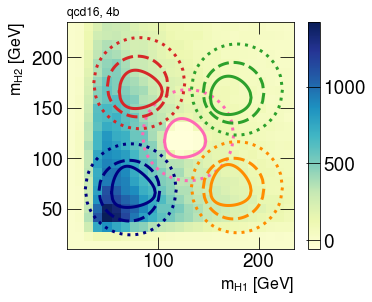

In [125]:
plt.figure(figsize=(5,4))
plt.hist2d(*m1m2.T,[25,25],[[10,235],[10,235]], 
           cmap="YlGnBu",weights=h_qcd.T.flatten())
plt.xlabel('$m_{H1}$ [GeV]',fontsize=16,loc='right')
plt.ylabel('$m_{H2}$ [GeV]',fontsize=16,loc='top')

plt.title(f'qcd{yr}, {ntag}b',loc='left')

plt.colorbar()

# Draw our current SR
xx,yy = draw_SR(x,y)
plt.plot(xx,yy,'hotpink',label=f'SR: ({x:.0f},{y:.0f})',lw=3)

xx,yy = draw_CR(x,y)
plt.plot(xx,yy,'hotpink',ls='dotted',label=f'CR: ({x:.0f},{y:.0f})',lw=3)

for i, xi,yi, ci in zip(range(4),[70,170,170,78],
                          [66,68,160,166],
                          ['navy','darkorange','C2','C3']):
    
    res_xi = 0.1*x/xi
    res_yi = 0.1*y/yi
        
    for f, ls in zip([draw_SR,draw_VR,draw_CR],['-','--','dotted']):
        if ls == '-':
            args = (xi,yi,res_xi,res_yi)
        else:
            args = (xi,yi)
        xx,yy = f(*args)
        plt.plot(xx,yy,ci,ls=ls,lw=3)


plt.show()

In [126]:
h_dat - h_qcd

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.14111809,  0.        ,  0.        ,  0.31878217,
         0.52587229,  0.21018316,  0.80005812,  0.96060401,  0.96848863,
         1.75908241,  1.23272083,  1.29011597,  1.66914656,  1.22751778,
         1.18236893,  1.05944841,  0.94453009,  1.09887034,  1.01575647,
         0.64423364,  1.01546244,  0.44860876,  0.78205988,  0.45986919],
       [ 0.        ,  0.50187114,  1.96020797,  4.33828006,  4.17826663,
         4.9061246 ,  5.92506524,  6.67266987,  7.04612663, 11.60035013,
        15.12138437, 12.63901728, 13.31953211, 13.06584849, 15.32891487,
        10.61217072,  8.9567537 , 11.10883651, 11